# yfinanceから各種指標を取得

yfinanceから金融関係の各種指標を取得して相関係数を可視化します。

---
[Google Colaboratoryで開く](https://colab.research.google.com/github/202408pythonciot/Data_Science_in_Finance/blob/main/Colaboratory/Base/get_index_corr.ipynb)

<a target="_blank" href="https://colab.research.google.com/github/202408pythonciot/Data_Science_in_Finance/blob/main/Colaboratory/Base/get_index_corr.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

---

## 1. 事前準備

### matplotlibの日本語化のためのライブラリをインストール

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=5e4a4dd2f6fd4bd1a7d68a59074ff22e293b50b51dfda82d2bd858909f8ff1ad
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


### yfinanceをインポート

In [ ]:
import yfinance as yf

### データ分析：pandasをインポート

In [ ]:
import pandas as pd

### グラフ描画：matplotlib（日本語表示対応 japanize_matplotlibも）をインポート

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

### 日付計算：datetimeをインポート

In [ ]:
import datetime as dt

## 2. データを取得

### 取得期間の計算
datetimeモジュールを使って，今日から180日前の日付を求め，それぞれsdayとedayの変数に代入します。

In [ ]:
sday = dt.date.today() - dt.timedelta(days=180)
eday = dt.date.today()

### 取得指標のリスト化
取得する金融指標のTickerをリスト化します。

In [ ]:
ticker_list = [
    '^GSPC',   # S&P 500
    '^NDX',    # NASDAQ 100
    'JPY=X',   # 円ドル
    '^N225',   # 日経225
    'HG=F', # copper(銅)
    'GC=F', # Gold(金)
    'CL=F', # Oil(原油)
    'SOXX', # 半導体
    '^DJT', # Transportation Average Index(DJTA)
    '^RUT', # Russel 2000
    '^VIX', # VIX index
    '^SKEW', # SKEW index
    'HYG', # ジャンクボンド
    '^TNX', # アメリカ10年国債
    'DX=F', # ドルインデックス
    'BTC-USD', # BTC
    'ETH-USD', # ETH
]

### データの取得
指標を取得します。当日調整終値だけをデータフレームとして保存します。

In [ ]:
df = yf.download(ticker_list, start=sday , end=eday)['Adj Close'] #当日調整終値

[*********************100%***********************]  17 of 17 completed


各指標をTickerコードから分かりやすい名前に付け替えを行います。

In [ ]:
df.rename(columns={
    '^GSPC':'S&P 500',
    '^NDX': 'NASDAQ 100',
    'JPY=X': '円ドル',
    '^N225': '日経225',
    'BTC-USD':'BTC',
    'CL=F':'原油',
    'DX=F':'ドルインデックス',
    'ETH-USD':'ETH',
    'GC=F':'金',
    'HG=F':'銅',
    'HYG':'ジャンクボンド',
    'SOXX':'半導体',
    '^DJT':'Dow30',
    '^RUT':'Rs2000',
    '^SKEW':'SKEW',
    '^TNX':'金利10Y',
    '^VIX':'VIX',

},inplace=True)

## 3. グラフ化

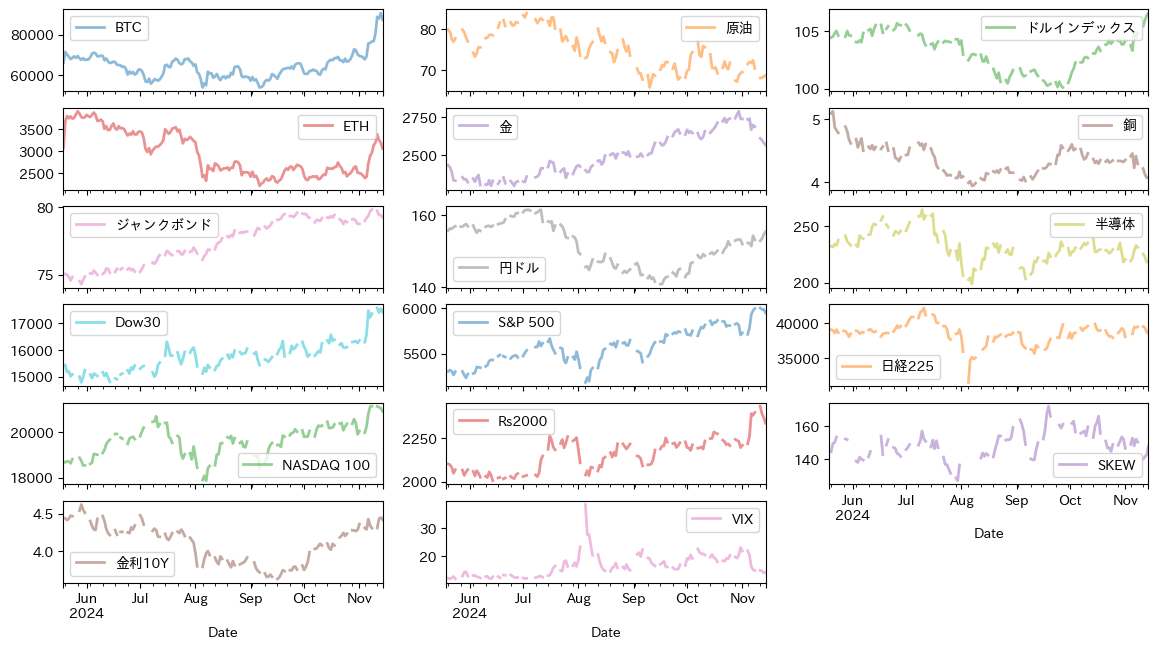

In [ ]:
df.plot(figsize=(14,10),linewidth=2,alpha=0.5,subplots=True,layout=(8,3),grid=False)
plt.show()

## 4. 各指数間の相関

Pandasのデータフレームの`corr`メソッドを使って，各データ列の相関係数を求めます。

In [ ]:
df.corr()

Ticker,BTC,原油,ドルインデックス,ETH,金,銅,ジャンクボンド,円ドル,半導体,Dow30,S&P 500,日経225,NASDAQ 100,Rs2000,SKEW,金利10Y,VIX
Ticker,,,,,,,,,,,,,,,,,
BTC,1.000000,-0.227485,0.526052,0.413527,0.214448,0.187652,0.107411,0.312539,0.051828,0.535522,0.378991,0.251570,0.403786,0.499493,-0.181858,0.588073,-0.259445
原油,-0.227485,1.000000,0.482784,0.625455,-0.739022,0.373369,-0.778139,0.695430,0.683058,-0.594214,-0.507180,0.415931,-0.133468,-0.554181,-0.238169,0.457838,-0.487292
ドルインデックス,0.526052,0.482784,1.000000,0.721161,-0.411837,0.339956,-0.568757,0.890134,0.476941,-0.122637,-0.144897,0.433884,0.166682,-0.201554,-0.452625,0.909058,-0.399069
ETH,0.413527,0.625455,0.721161,1.000000,-0.715785,0.548102,-0.815189,0.805501,0.592694,-0.418042,-0.487225,0.419939,-0.155192,-0.380175,-0.446456,0.753311,-0.687293
金,0.214448,-0.739022,-0.411837,-0.715785,1.000000,-0.195034,0.916913,-0.530878,-0.400234,0.757982,0.824975,-0.049081,0.532654,0.741000,0.441949,-0.324429,0.459488
銅,0.187652,0.373369,0.339956,0.548102,-0.195034,1.000000,-0.434382,0.520112,0.622084,-0.346692,-0.153942,0.513764,0.103889,-0.329496,0.188935,0.540656,-0.540543
ジャンクボンド,0.107411,-0.778139,-0.568757,-0.815189,0.916913,-0.434382,1.000000,-0.694246,-0.483762,0.805641,0.833970,-0.150835,0.504587,0.788746,0.433639,-0.550336,0.464109
円ドル,0.312539,0.695430,0.890134,0.805501,-0.530878,0.520112,-0.694246,1.000000,0.733825,-0.294382,-0.228227,0.652125,0.179939,-0.328072,-0.372016,0.881327,-0.571296
半導体,0.051828,0.683058,0.476941,0.592694,-0.400234,0.622084,-0.483762,0.733825,1.000000,-0.305662,-0.014278,0.762757,0.415280,-0.282263,-0.005339,0.520151,-0.728544


各指標の相関係数をseabornを使ってヒートマップ化します。

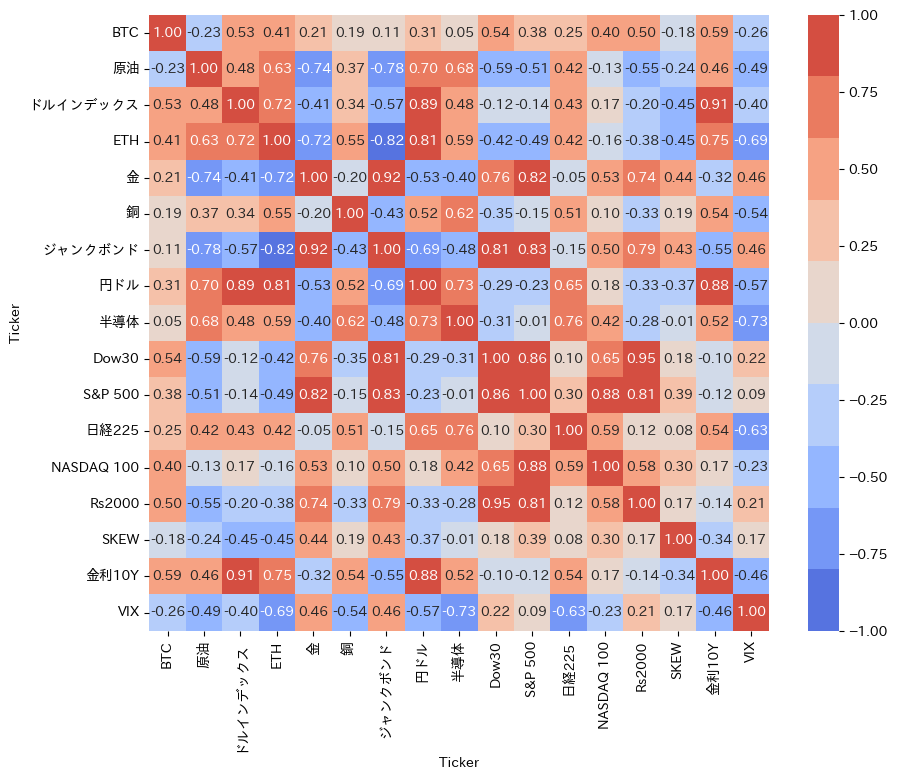

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)
plt.show()